# ANPR with Easy OCR and OpenCV

## Resources
- https://medium.com/augmented-startups/automatic-number-plate-recognition-with-easy-ocr-and-open-cv-6d121384cdc7
- https://www.geeksforgeeks.org/license-plate-recognition-with-opencv-and-tesseract-ocr/

## OCR Engine
OCR or Optical Character Recognition allows computer to convert typed, handwritten or printed text into encoded text that computer can understand and can then processed

For our project, we will be using Google's Tesseract OCR engine to read sample license plates

## Image Processing
To make it easier for the OCR to read the license plates, we will apply different image processing techniques

### Image Resizing
Multiply both dimensions of the images by 2

### Convert to Grayscale
Grayscale optimizes detection and reduce the amount of colors present in image drastically to easily detect license plates

### Image Denoise
Make the edges more clear and smoother

## Process
Locate the 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils
import easyocr

## Displaying image
Convert an image to gray scale to reduce the computational strain

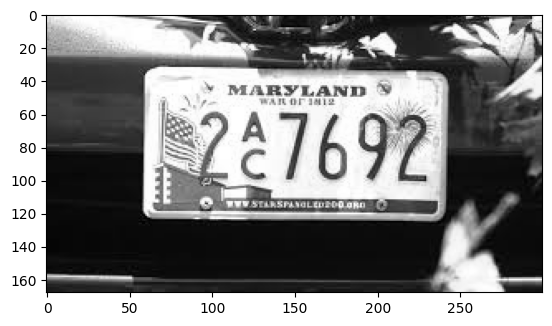

In [5]:
img = cv2.imread('../images/2AC7692.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## Applying filter and finding edges
Filtering removes noise and detecting edges is useful for extracting data from images

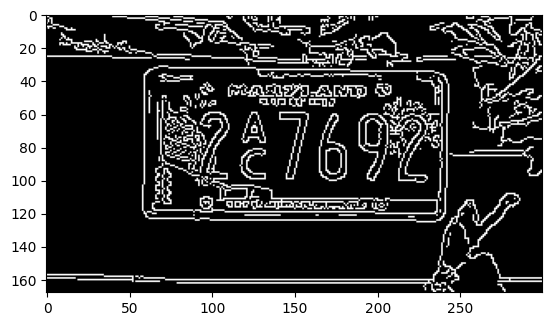

In [6]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## Finding Contours

In [7]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
print(contours)

[array([[[ 68,  31]],

       [[ 67,  32]],

       [[ 65,  32]],

       [[ 64,  33]],

       [[ 62,  33]],

       [[ 59,  36]],

       [[ 59, 102]],

       [[ 58, 103]],

       [[ 58, 118]],

       [[ 59, 119]],

       [[ 59, 120]],

       [[ 60, 121]],

       [[ 60, 122]],

       [[ 61, 122]],

       [[ 62, 123]],

       [[ 89, 123]],

       [[ 90, 124]],

       [[ 92, 124]],

       [[ 93, 123]],

       [[ 98, 123]],

       [[ 99, 124]],

       [[223, 124]],

       [[224, 125]],

       [[235, 125]],

       [[236, 124]],

       [[238, 124]],

       [[240, 122]],

       [[240, 121]],

       [[241, 120]],

       [[241, 105]],

       [[242, 104]],

       [[242,  60]],

       [[243,  59]],

       [[243,  42]],

       [[242,  41]],

       [[242,  39]],

       [[241,  38]],

       [[241,  37]],

       [[240,  36]],

       [[238,  36]],

       [[237,  35]],

       [[235,  35]],

       [[234,  34]],

       [[184,  34]],

       [[183,  33]],

       [[

## Determining if each contours represent a square or a number plate

In [8]:
location = None

for c in contours:
    approx = cv2.approxPolyDP(c, 10, True)
    if len(approx) == 4:
        location = approx
        break

print(location)

[[[ 59  36]]

 [[ 62 123]]

 [[241 120]]

 [[240  36]]]


## Masking image

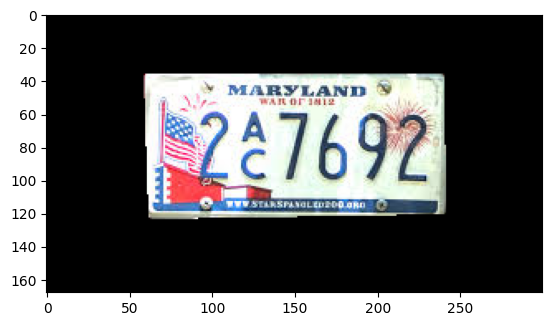

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask = mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

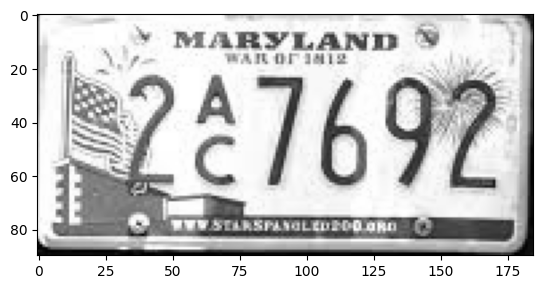

In [10]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
# Adding Buffer
cropped_image = gray[x1:x2+3, y1:y2+3]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [11]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete[([[49, 5], [137, 5], [137, 21], [49, 21]], 'MAR"AAND', 0.1362897532100406), ([[52, 15], [177, 15], [177, 71], [52, 71]], '27692', 0.9780079459218811)]


MAR"AAND


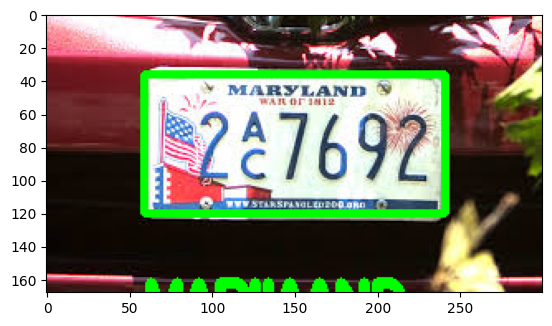

In [13]:
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 5)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
print(text)